### Mar 2024: END SEMESTER ASSESSMENT (ESA)
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935: Introduction to Deep Learning and Applications

#### Section B: Question No:2   (10 marks)
Build a Convolution Neural Network to classify 5 classes of Indian food items.
Dataset_Folder Name: Food classification.

Conditions to consider:

--Parameters should not cross 300000

--Should not use more than 4 layers (except input and output, including convolution and dense layers)

--Use Adam Optimizer


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models as sm

sm.set_framework('tf.keras')
sm.framework()

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [5]:
train_dir="Food classification/Train"
test_dir="Food classification/Test"

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
target_size = (64, 64)
train_data_generator = train_image_generator.flow_from_directory(directory=train_dir, subset='training', 
                                                                 shuffle=True, target_size=target_size)

validation_data_generator = train_image_generator.flow_from_directory(directory=train_dir, subset='validation', 
                                                                 shuffle=True, target_size=target_size)

test_data_generator = test_image_generator.flow_from_directory(directory=test_dir, target_size=target_size)

Found 75 images belonging to 5 classes.
Found 15 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [9]:
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 3

In [10]:
model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3)

Epoch 1/3
3/3 [==============================] - 4s 1s/step - loss: 1.7113 - accuracy: 0.1600 - val_loss: 1.5817 - val_accuracy: 0.2667
Epoch 2/3
3/3 [==============================] - 2s 434ms/step - loss: 1.5531 - accuracy: 0.3733 - val_loss: 1.5613 - val_accuracy: 0.3333
Epoch 3/3
3/3 [==============================] - 2s 576ms/step - loss: 1.5269 - accuracy: 0.3867 - val_loss: 1.5266 - val_accuracy: 0.4000


In [11]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Base Model accuracy: {accuracy:.2f}')

2/2 [==============================] - 1s 571ms/step - loss: 1.5587 - accuracy: 0.3800
Base Model accuracy: 0.38


#### Section B: Question No:3   (20 marks)

Improve the baseline model (model build in question2) performance and save the weights of improved model

Conditions to consider:

- Apply Data Augmentation if required

- No parameter limit

- Can use any number of layers

- Use any optimizers of your choice

- Use early stopping and save best model callbacks


In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=60, zoom_range=0.2, 
                                           height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True, 
                                           shear_range=0.2)
test_image_generator = ImageDataGenerator(rescale=1./255)

target_size = (128, 128)
train_data_generator = train_image_generator.flow_from_directory(directory=train_dir, subset='training', 
                                                                 shuffle=True, target_size=target_size)

validation_data_generator = train_image_generator.flow_from_directory(directory=train_dir, subset='validation', 
                                                                 shuffle=True, target_size=target_size)

test_data_generator = test_image_generator.flow_from_directory(directory=test_dir, target_size=target_size)

Found 75 images belonging to 5 classes.
Found 15 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [15]:
model = Sequential()
model.add(Conv2D(200, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(100, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(100, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 batch_normalization_8 (Bat  (None, 126, 126, 200)     800       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 126, 126, 200)     0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 100)       180100    
                                                                 
 batch_normalization_9 (Bat  (None, 61, 61, 100)      

In [16]:
early_stop = EarlyStopping(restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_optimized_model', save_best_only=True)

model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, callbacks=[early_stop, model_checkpoint])

Epoch 1/3
3/3 [==============================] - ETA: 0s - loss: 2.1456 - accuracy: 0.2933INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


3/3 [==============================] - 13s 4s/step - loss: 2.1456 - accuracy: 0.2933 - val_loss: 1.8348 - val_accuracy: 0.2667
Epoch 2/3
3/3 [==============================] - ETA: 0s - loss: 1.5760 - accuracy: 0.3600INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


3/3 [==============================] - 10s 3s/step - loss: 1.5760 - accuracy: 0.3600 - val_loss: 1.6635 - val_accuracy: 0.1333
Epoch 3/3
3/3 [==============================] - 7s 2s/step - loss: 1.5150 - accuracy: 0.4267 - val_loss: 1.8506 - val_accuracy: 0.2000


In [17]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Base Model accuracy: {accuracy:.2f}')

2/2 [==============================] - 1s 230ms/step - loss: 1.6074 - accuracy: 0.2600
Base Model accuracy: 0.26


#### Section C: Question 4:

Use the Transfer learning technique to improve the previous section model’s classification performance. 
The pre-trained models weights are given to you. The architecture of pre-trained model till convolution layers and its corresponding weights are already saved under the folder ‘base_model’. The given model convolution layers already freezed. (Note: This pre-trained model provided is MobileNet).

Load these weights along with architecture using the following syntax:

cust_model=tf.keras.models.load_model("base_model") 

“base_model” is the folder name under all the required models files are exist. 

Design the remaining layers of network in your own way (from flattening to output layer) and train only its weights with the dataset given.


In [22]:
train_dir="Food classification/Train"
test_dir="Food classification/Test"

In [18]:
base_model = tf.keras.models.load_model('base_model')
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['Conv1_pad[0][0]']           
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                           

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

In [21]:
for layer_numer, layer in enumerate(base_model.layers):
    print(layer_numer, layer, layer.trainable)

0 <keras.src.engine.input_layer.InputLayer object at 0x0000024B9DBE32B0> True
1 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000024B9DB40AC0> False
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000024B97D11220> False
3 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000024B9B867850> False
4 <keras.src.layers.activation.relu.ReLU object at 0x0000024B9B867340> False
5 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x0000024B9DC36070> False
6 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000024B9DC5B490> False
7 <keras.src.layers.activation.relu.ReLU object at 0x0000024B9DC5B940> False
8 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000024B9DB0AD60> False
9 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000024B9B6882E0> False
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000024B9B6886

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=60, zoom_range=0.2, 
                                           height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True, 
                                           shear_range=0.2, 
                                           preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255, 
                                          preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

target_size = (224, 224)
train_data_generator = train_image_generator.flow_from_directory(directory=train_dir, subset='training', 
                                                                 shuffle=True, target_size=target_size)

validation_data_generator = train_image_generator.flow_from_directory(directory=train_dir, subset='validation', 
                                                                 shuffle=True, target_size=target_size)

test_data_generator = test_image_generator.flow_from_directory(directory=test_dir, target_size=target_size)

In [25]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
p = GlobalAveragePooling2D()(x)
outputs = Dense(5, activation='softmax')(p)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
early_stop = EarlyStopping(restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_tl_model', save_best_only=True)

model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, callbacks=[early_stop, model_checkpoint])

Epoch 1/3
3/3 [==============================] - ETA: 0s - loss: 2.7104 - accuracy: 0.2133INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


3/3 [==============================] - 19s 8s/step - loss: 2.7104 - accuracy: 0.2133 - val_loss: 1.9679 - val_accuracy: 0.2000
Epoch 2/3
3/3 [==============================] - ETA: 0s - loss: 1.9274 - accuracy: 0.3067INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


3/3 [==============================] - 15s 7s/step - loss: 1.9274 - accuracy: 0.3067 - val_loss: 1.4741 - val_accuracy: 0.3333
Epoch 3/3
3/3 [==============================] - ETA: 0s - loss: 1.3741 - accuracy: 0.3867INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


3/3 [==============================] - 16s 7s/step - loss: 1.3741 - accuracy: 0.3867 - val_loss: 1.2331 - val_accuracy: 0.3333


In [28]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Transfer Learning Model accuracy: {accuracy:.2f}')

2/2 [==============================] - 1s 278ms/step - loss: 1.3661 - accuracy: 0.4400
Transfer Learning Model accuracy: 0.44


#### Section C: Question 5:    (15 Marks)

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Dataset contains the images and the corresponding masks. Find the dataset under the folder “Unet_Dataset”. Dataset contains the Chest X-ray images of Pneumothorax diseases and the corresponding masks.

Students can make use of pre-trained Unet segmentation model using the library

import segmentation_models as sm

Hints :
    1. Load all the images in one array of size 96x128x128x1 Where 96 is total number of trained images 128x128x3 is each image size
    2. Load all the masks in one array of size 96x128x128x1
    3. Scale both the above two arrays
    4. Split the data into train and test
    5. Define the pre-trained segmentation model. Use encoder_weight=None, If internet access is not available.
    6. Compile with appropriate loss and metric and fit the data into it.
    7. Reduce the batch_size to 1 or 2, if you get any memory related error
    
Run the model for minimum 2 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result.



In [29]:
# hint : uncomment  below to fetch path
image_dir='Unet_Dataset/CXR_png/'
mask_dir='Unet_Dataset/masks/'

In [31]:
size = 128
image_dataset = []
mask_dataset = []

images = os.listdir(image_dir)
print(len(images))

for _, image_name in enumerate(images):
    if image_name.split('.')[-1]== 'png':
        image = cv2.imread(image_dir + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((size, size))
        image_dataset.append(np.array(image))


masks = os.listdir(mask_dir)
print(len(masks))

for _, image_name in enumerate(masks):
    if image_name.split('.')[-1]== 'png':
        image = cv2.imread(mask_dir + image_name, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (size, size))
        (threshold, bwimage) = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        image = Image.fromarray(bwimage)
        mask_dataset.append(np.array(bwimage))

18
18


In [32]:
image_dataset = np.array(image_dataset).astype('float32')
image_dataset = np.expand_dims(image_dataset, axis=3)
image_dataset.shape

(18, 128, 128, 1)

In [33]:
mask_dataset = np.array(mask_dataset)
mask_dataset = np.where(mask_dataset > 0.5, 1, 0).astype('float32')
mask_dataset = np.expand_dims(mask_dataset, axis=3)
mask_dataset.shape

(18, 128, 128, 1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2, random_state=43)

backbone = 'resnet34'
processing_func = sm.get_preprocessing(backbone)
x_train_prepprocessed = processing_func(x_train)
x_test_prepprocessed = processing_func(x_test)

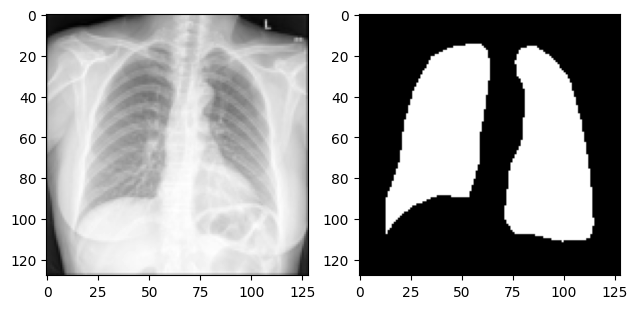

In [36]:
n = np.random.randint(1, len(image_dataset))

plt.subplot(1, 2, 1)
plt.imshow(image_dataset[n, :, :, :], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(mask_dataset[n, :, :, :], cmap='gray')

plt.tight_layout()
plt.show()

In [37]:
model = sm.Unet(backbone_name=backbone, encoder_weights=None, classes=1, activation='sigmoid', input_shape=(128, 128, 1))

model.compile(optimizer='adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 128, 128, 1)          3         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 1)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

                                                                                                  
 zero_padding2d_6 (ZeroPadd  (None, 34, 34, 64)           0         ['stage1_unit3_relu1[0][0]']  
 ing2D)                                                                                           
                                                                                                  
 stage1_unit3_conv1 (Conv2D  (None, 32, 32, 64)           36864     ['zero_padding2d_6[0][0]']    
 )                                                                                                
                                                                                                  
 stage1_unit3_bn2 (BatchNor  (None, 32, 32, 64)           256       ['stage1_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage1_un

                                                                                                  
 zero_padding2d_12 (ZeroPad  (None, 18, 18, 128)          0         ['stage2_unit3_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage2_unit3_conv1 (Conv2D  (None, 16, 16, 128)          147456    ['zero_padding2d_12[0][0]']   
 )                                                                                                
                                                                                                  
 stage2_unit3_bn2 (BatchNor  (None, 16, 16, 128)          512       ['stage2_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage2_un

                                                                                                  
 zero_padding2d_18 (ZeroPad  (None, 10, 10, 256)          0         ['stage3_unit2_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage3_unit2_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_18[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit2_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_un

 ding2D)                                                                                          
                                                                                                  
 stage3_unit5_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_24[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit5_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit5_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_unit5_relu2 (Activa  (None, 8, 8, 256)            0         ['stage3_unit5_bn2[0][0]']    
 tion)                                                                                            
          

 ding2D)                                                                                          
                                                                                                  
 stage4_unit2_conv1 (Conv2D  (None, 4, 4, 512)            2359296   ['zero_padding2d_30[0][0]']   
 )                                                                                                
                                                                                                  
 stage4_unit2_bn2 (BatchNor  (None, 4, 4, 512)            2048      ['stage4_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage4_unit2_relu2 (Activa  (None, 4, 4, 512)            0         ['stage4_unit2_bn2[0][0]']    
 tion)                                                                                            
          

 decoder_stage1a_conv (Conv  (None, 16, 16, 128)          442368    ['decoder_stage1_concat[0][0]'
 2D)                                                                ]                             
                                                                                                  
 decoder_stage1a_bn (BatchN  (None, 16, 16, 128)          512       ['decoder_stage1a_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage1a_relu (Acti  (None, 16, 16, 128)          0         ['decoder_stage1a_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 decoder_stage1b_conv (Conv  (None, 16, 16, 128)          147456    ['decoder_stage1a_relu[0][0]']
 2D)      

 decoder_stage4b_bn (BatchN  (None, 128, 128, 16)         64        ['decoder_stage4b_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage4b_relu (Acti  (None, 128, 128, 16)         0         ['decoder_stage4b_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 final_conv (Conv2D)         (None, 128, 128, 1)          145       ['decoder_stage4b_relu[0][0]']
                                                                                                  
 sigmoid (Activation)        (None, 128, 128, 1)          0         ['final_conv[0][0]']          
                                                                                                  
Total para

In [52]:
early_stop = EarlyStopping(restore_best_weights=True, patience=10, min_delta=0.01)
model_checkpoint = ModelCheckpoint(filepath='best_tl_model', save_best_only=True)

model.fit(x_train_prepprocessed, y_train, epochs=10, 
          callbacks=[early_stop, model_checkpoint], validation_data=(x_test_prepprocessed, y_test))

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.4070 - iou_score: 0.6908INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


1/1 [==============================] - 18s 18s/step - loss: 0.4070 - iou_score: 0.6908 - val_loss: 1738.4186 - val_iou_score: 0.0399
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.3893 - iou_score: 0.7034 - val_loss: 1840.1470 - val_iou_score: 0.0571
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.3830 - iou_score: 0.7094INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


1/1 [==============================] - 19s 19s/step - loss: 0.3830 - iou_score: 0.7094 - val_loss: 1151.0032 - val_iou_score: 0.0397
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.4163 - iou_score: 0.6936 - val_loss: 1759.7253 - val_iou_score: 0.0325
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.4064 - iou_score: 0.7022 - val_loss: 1999.8966 - val_iou_score: 0.0113
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.3584 - iou_score: 0.7305 - val_loss: 1746.7072 - val_iou_score: 0.0025
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.3409 - iou_score: 0.7425 - val_loss: 1605.3774 - val_iou_score: 5.4129e-10
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.3292 - iou_score: 0.7509 - val_loss: 1672.8276 - val_iou_score: 5.6835e-10
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.3133 - iou_score: 0.7621 - val_loss: 1763.5039 - val_iou_score: 5.7572e-10
Epo

In [57]:
n = np.random.randint(0, len(x_test_prepprocessed))

test_image = x_test_prepprocessed[n]
test_image = np.expand_dims(test_image, axis=0)

predicted_mask = model.predict(test_image)
print(predicted_mask.shape)
predicted_mask = (predicted_mask[0, :, :, 0]>0.5).astype(np.uint8)

1/1 [==============================] - 0s 93ms/step
(1, 128, 128, 1)


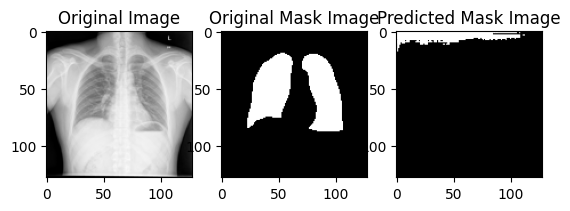

In [58]:
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(x_test[n, :, : ,:], cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Original Mask Image')
plt.imshow(y_test[n, :, : ,:], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask Image')
plt.imshow(predicted_mask, cmap='gray')